<a href="https://colab.research.google.com/github/RicardoMenna/MachineLearning_TP6/blob/main/TPN%C2%B06_BostonHousingPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico N°6**
**Ejercicio: Comprensión de los precios de la vivienda en Boston** 

**El dataset de viviendas de Boston contiene 506 observaciones y 14 variables. El objetivo de este proyecto es comprender cuál de las variables en estudio impulsan el precio de las viviendas en Boston y poder predecir los precios a partir de los atributos.**

In [42]:
"""Imprtaciones"""
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
true_news.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Hago un chequeo de shapes.**

In [44]:
true_news.shape

(506, 14)

**Compruebo si faltan valores.**

In [45]:
true_news.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

**Visualizo las filas donde faltan esos valores.**

In [46]:
true_news[true_news.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


**Elimino las filas donde faltan esos valores.**

In [47]:
data=true_news.dropna()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


**Busco la correlación entre los features.**

In [48]:
correlacion = data.corr()
correlacion.shape

(14, 14)

**Ploteo el heatmap de correlación entre los features.**

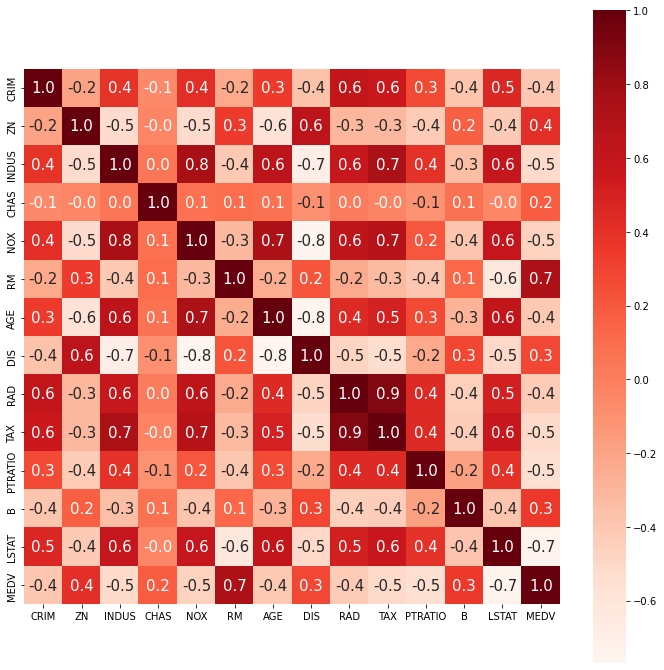

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(correlacion, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')

**Separo los features.**

In [50]:
X = data.drop(["MEDV"], axis = 1)
y = data["MEDV"]

**Separo para hacer el entrenamiento.**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

#Regresión Lineal

**Ahora realizo la Regresión lineal.**

In [52]:
# Creo una regresión lineal
regresion_lineal = LinearRegression()

# Entreno el modelo usando los datos de entrenamiento 
regresion_lineal.fit(X_train, y_train)

LinearRegression()

**Convierto los valores a un Dataframe.**

In [53]:
coeficientes = pd.DataFrame([X_train.columns,regresion_lineal.coef_]).T
coeficientes = coeficientes.rename(columns={0: "Atributo", 1: "Coeficientes"})
coeficientes

,Atributo,Coeficientes
0,CRIM,-0.0978922
1,ZN,0.0575386
2,INDUS,0.0286649
3,CHAS,2.67138
4,NOX,-18.4298
5,RM,4.80824
6,AGE,-0.00919908
7,DIS,-1.27511
8,RAD,0.312867
9,TAX,-0.0145276


**Realizo la predicción e imprimo las métricas.**

In [54]:
y_pred = regresion_lineal.predict(X_train)

#Imprimo métricas
rcuadrado_lineal=metrics.r2_score(y_train, y_pred)
print("R^2:",rcuadrado_lineal)
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_train, y_pred))
print("MSE:",metrics.mean_squared_error(y_train, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7916220715037846
Adjusted R^2: 0.7812430942223639
MAE: 2.8478546192554064
MSE: 15.510915759591517
RMSE: 3.9383899958728716


**Explicación de las métricas impresas.**



*   R^2 : Es una medida de la relación lineal entre X e Y. Se interpreta como la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente.
*   Adjusted R^2 : el R-cuadrado ajustado compara el poder explicativo de los modelos de regresión que contienen diferentes números de predictores.
*   MAE : Es la media del valor absoluto de los errores. Mide la diferencia entre dos variables continuas, aquí valores reales y pronosticados de y.
*   MSE : El error cuadrático medio (MSE) es como el MAE, pero eleva al cuadrado la diferencia antes de sumarlos todos en lugar de usar el valor absoluto.
*   RMSE : Es la raíz cuadrada de MSE.

**Visualización de las diferencias entre los precios reales y los valores previstos.**

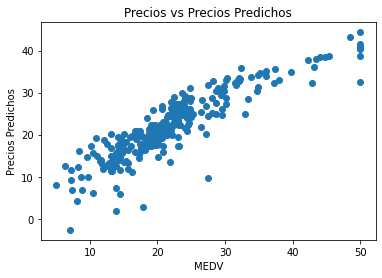

In [55]:
plt.scatter(y_train, y_pred)
plt.xlabel("MEDV")
plt.ylabel("Precios Predichos")
plt.title("Precios vs Precios Predichos")
plt.show()

**Comprobación de los residuos.**

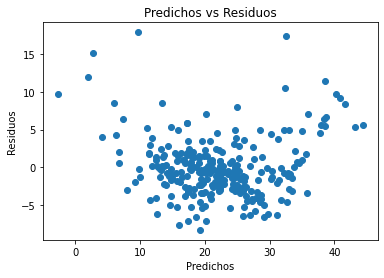

In [56]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predichos vs Residuos")
plt.xlabel("Predichos")
plt.ylabel("Residuos")
plt.show()

**Los valores se distribuyen por igual alrededor de cero. Entonces se satisface el supuesto de linealidad.**

**Realizo una prueba de los datos e imprimo las métricas correspondientes.**

In [57]:
y_test_pred = regresion_lineal.predict(X_test)
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121345261468226
Adjusted R^2: 0.6764940389078578
MAE: 3.466626786161467
MSE: 29.586277961871062
RMSE: 5.439326976921967


**Se puede ver que estos valores son similares a los mostrados anteriormente, por lo tanto, se puede decir que el modelo no está sobreajustado.**

# Regresión Random Forest

**Creo un Random Forest y entreno el modelo usando los valores de entrenamiento anteriores.**

In [58]:
regresion_rf = RandomForestRegressor()

regresion_rf.fit(X_train, y_train)

RandomForestRegressor()

**Realizo la predicción e imprimo las métricas.**

In [59]:
y_pred = regresion_rf.predict(X_train)

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9806924183369734
Adjusted R^2: 0.9797307380242556
MAE: 0.8420327272727276
MSE: 1.4371880690909122
RMSE: 1.198827789589027


**Visualización de las diferencias entre los precios reales y los valores previstos.**

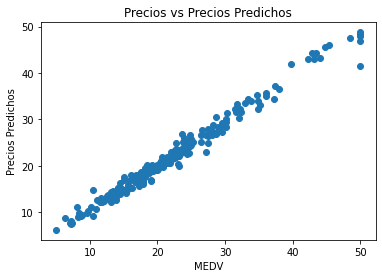

In [60]:
plt.scatter(y_train, y_pred)
plt.xlabel("MEDV")
plt.ylabel("Precios Predichos")
plt.title("Precios vs Precios Predichos")
plt.show()

**Comprobación de los residuos.**

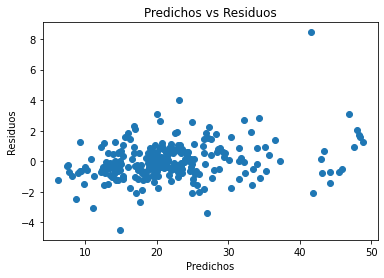

In [61]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predichos vs Residuos")
plt.xlabel("Predichos")
plt.ylabel("Residuos")
plt.show()

**Realizo una prueba de los datos e imprimo las métricas correspondientes.**

In [62]:
y_test_pred = regresion_rf.predict(X_test)

rcuadrado_rf=metrics.r2_score(y_train, y_pred)
print('R^2:', rcuadrado_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9806924183369734
Adjusted R^2: 0.699892258879055
MAE: 2.820100840336137
MSE: 27.446390840336168
RMSE: 5.23893031451423


#Regresión Tweedie

**Creo una regresión Tweedie y la entreno.**

In [63]:
regresion_tw=linear_model.TweedieRegressor()

regresion_tw.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


TweedieRegressor()

**Realizo la predicción e imprimo las métricas.**

In [64]:
y_pred = regresion_tw.predict(X_train)

rcuadrado_tw=metrics.r2_score(y_train, y_pred)
print('R^2:',rcuadrado_tw)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7114000427443338
Adjusted R^2: 0.6970253322296838
MAE: 3.367769562590086
MSE: 21.48235975623327
RMSE: 4.6349066610055125


**Visualización de las diferencias entre los precios reales y los valores previstos.**

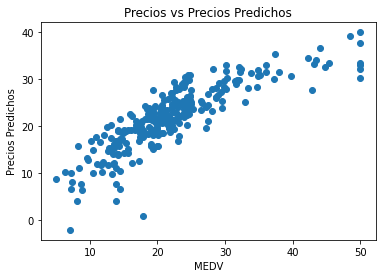

In [65]:
plt.scatter(y_train, y_pred)
plt.xlabel("MEDV")
plt.ylabel("Precios Predichos")
plt.title("Precios vs Precios Predichos")
plt.show()

**Comprobación de los residuos.**

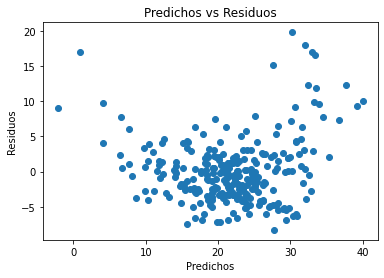

In [66]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predichos vs Residuos")
plt.xlabel("Predichos")
plt.ylabel("Residuos")
plt.show()

**Realizo una prueba de los datos e imprimo las métricas correspondientes.**

In [67]:
y_test_pred = regresion_tw.predict(X_test)

print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6391563198605894
Adjusted R^2: 0.5944804356528528
MAE: 3.9011960817486475
MSE: 37.08684226172355
RMSE: 6.089896736540247


#Regresión SVM

**Creo y escalo los datos para tener un mejor resultado.**

In [68]:
datos_escalados = StandardScaler()
X_train = datos_escalados.fit_transform(X_train)
X_test = datos_escalados.transform(X_test)

**Creo una regresión SVM y la entreno.**

In [69]:
regresion_svm = svm.SVR()

regresion_svm.fit(X_train, y_train)

SVR()

**Realizo la predicción e imprimo las métricas.**

In [70]:
y_pred = regresion_svm.predict(X_train)

rcuadrado_svm=metrics.r2_score(y_train, y_pred)
print('R^2:',rcuadrado_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6676836331149043
Adjusted R^2: 0.6511314769098995
MAE: 2.8566860031638615
MSE: 24.73645462111332
RMSE: 4.973575637417543


**Visualización de las diferencias entre los precios reales y los valores previstos.**

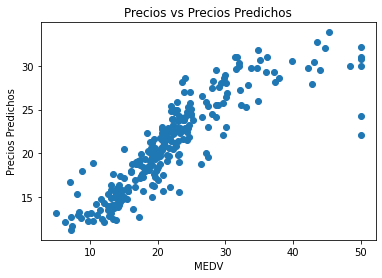

In [71]:
plt.scatter(y_train, y_pred)
plt.xlabel("MEDV")
plt.ylabel("Precios Predichos")
plt.title("Precios vs Precios Predichos")
plt.show()

**Comprobación de los residuos.**

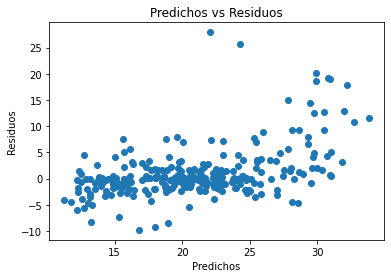

In [72]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predichos vs Residuos")
plt.xlabel("Predichos")
plt.ylabel("Residuos")
plt.show()

**Realizo una prueba de los datos e imprimo las métricas correspondientes.**

In [73]:
y_test_pred = regresion_svm.predict(X_test)

print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.4851058749038901
Adjusted R^2: 0.4213570784634194
MAE: 4.235373072306773
MSE: 52.9198604546711
RMSE: 7.274603800529009


#Evaluación

In [75]:
modelos = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Random Forest", "Tweedie", "SVM"],
    'R-squared Score': [rcuadrado_lineal*100, rcuadrado_rf*100, rcuadrado_tw*100, rcuadrado_svm*100]})
modelos.sort_values(by='R-squared Score', ascending=False)

,Modelo,R-squared Score
1,Random Forest,98.069242
0,Regresión Lineal,79.162207
2,Tweedie,71.140004
3,SVM,66.768363


#Conclusión

**Se puede observar en el cuadro de la sección de evaluación que el mejor rendimiento lo tiene Random Forest. Sin embargo, este valor es demasiado grande. También se ve que la Regresión lineal tiene un buen desempeño, mientrás que SVM fue el peor de los cuatro métodos que se utilizaron.**